In [45]:
import numpy as np
import pandas as pd

In [46]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

dt_clf = DecisionTreeClassifier( )
bank_df = pd.read_csv('C:\\Users\\flowe\\OneDrive - San Francisco State University\\Project_Expert_GitHub\\Project_Python\\JupyterNotebookWorkingSpace\\PerfectGuid\\1장\\bank.csv')

In [69]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [70]:
# life span 78.54, sd 15 # 72세부터 85세까지 90% 사망
bank_balance = bank_df[(bank_df['age'] <= 72)].groupby('age')['balance'].mean()
#bank_job = pd.DataFrame(bank_job)
bank_balance.head(10)

age
18     237.000000
19     283.153846
20    1013.200000
21    1064.200000
22     844.979167
23     970.676471
24    1473.936842
25     963.077381
26    1187.646809
27    1551.703252
Name: balance, dtype: float64

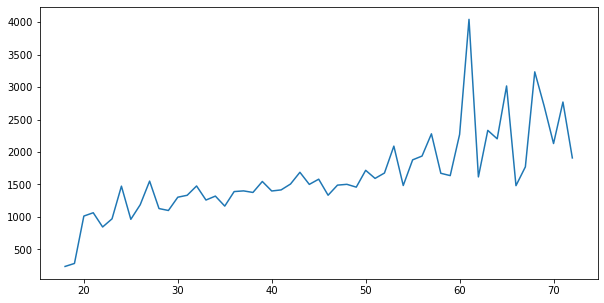

In [71]:
plt.figure(figsize = (10, 5))
plt.plot(bank_balance)

In [72]:
bank_duration = bank_df[(bank_df['age'] <= 72)].groupby('age')['duration'].mean()
#bank_job = pd.DataFrame(bank_job)
bank_duration.head(10)

age
18    202.625000
19    228.846154
20    255.050000
21    294.333333
22    260.125000
23    362.955882
24    388.357895
25    398.886905
26    405.723404
27    375.764228
Name: duration, dtype: float64

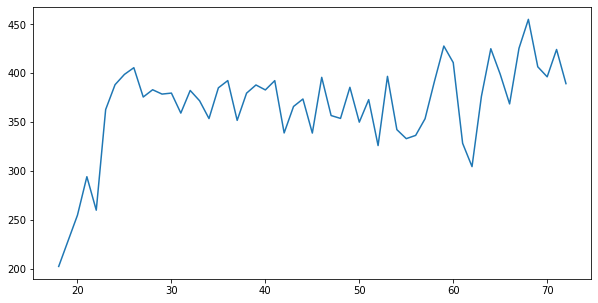

In [73]:
plt.figure(figsize = (10, 5))
plt.plot(bank_duration)

In [103]:
bank_data = bank_df[(bank_df['age'] <= 72)][['age', 'campaign']]
bank_data.head(10)

,age,campaign
0,59,1
1,56,1
2,41,1
3,55,1
4,54,2
5,42,2
6,56,1
7,60,1
8,37,1
9,28,3


In [104]:
bank_target = bank_df[(bank_df['age'] <= 72)]['balance']
bank_target.head(10)

0    2343
1      45
2    1270
3    2476
4     184
5       0
6     830
7     545
8       1
9    5090
Name: balance, dtype: int64

In [105]:
X_train, X_test, y_train, y_test = train_test_split(bank_data, bank_target, test_size=0.2, random_state=11)

In [106]:
# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행 
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [107]:
pred = dt_clf.predict(X_test)

In [108]:
print(len(X_test))
print(X_test)

2189
       age  campaign
6051    28         2
2928    43         2
93      31         4
11058   33         2
1923    38         1
...    ...       ...
9433    29         1
5612    30         1
5402    31         1
7452    45         4
3036    30         2

[2189 rows x 2 columns]


In [109]:
pred

array([159,   0,   0, ...,   0,   0,   0], dtype=int64)

In [110]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.0521
